In [118]:
#sideris

# Exercise: The Price of Weed

#### Summary

Find out how marijuana prices change over time and place in the United States

#### Data Source(s)

Data scraped from http://www.priceofweed.com/, GitHub repository at, https://github.com/frankbi/price-of-weed

Marijuana laws by state from https://data.world/sya/marijuana-laws-by-state

#### Files

- Lots of csvs in data/, formatted at DDMMYYY.csv, daily prices for different states
- `state_marijuana_laws_10_2016.csv`, marijuana laws by state

#### Data dictionary

- **State** the state name
- **HighQ** high quality marijuana, price per ounce
- **HighQN** high quality marijuana, sample size 
- **MedQ** medium quality marijuana, price per ounce
- **MedQN** medium quality marijuana, sample size
- **LowQ** low quality marijuana, price per ounce
- **LowQN** low quality marijuana, sample size

#### Skills

- Reading in many many files
- Combining multiple dataframes
- Cleaning up columns
- Customizing matplotlib graphs

# Read in `data/weedprices01012015.csv`

In [119]:
import pandas as pd
%matplotlib inline
import numpy as np

In [120]:
df = pd.read_csv("data/weedprices01012015.csv")

In [121]:
df

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,337.54,1539,208.24,1463,I feel bad for these guys -->,182
1,Alaska,303.02,350,270.45,475,I feel bad for these guys -->,37
2,Arizona,298.51,2638,209.43,2426,I feel bad for these guys -->,306
3,Arkansas,341.68,846,207.20,836,I feel bad for these guys -->,145
4,California,243.96,16512,189.35,19151,I feel bad for these guys -->,1096
5,Colorado,243.72,3148,195.11,2877,I feel bad for these guys -->,178
6,Connecticut,337.26,1835,267.99,2069,I feel bad for these guys -->,126
7,Delaware,364.19,490,234.72,431,I feel bad for these guys -->,41
8,District of Columbia,348.66,657,281.93,578,I feel bad for these guys -->,49
9,Florida,300.88,9369,217.05,8166,I feel bad for these guys -->,695


## Cleaning things up

I have no idea what the whole "I feel bad for these guys" means, but *it certainly isn't good data*. It should probably be NaN instead: I'll let you decide how you're going to fix that one.

In [122]:
df['LowQ'] = np.nan
df.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,337.54,1539,208.24,1463,NaN,182
1,Alaska,303.02,350,270.45,475,NaN,37
2,Arizona,298.51,2638,209.43,2426,NaN,306
3,Arkansas,341.68,846,207.20,836,NaN,145
4,California,243.96,16512,189.35,19151,NaN,1096


## Graph the top 10 least expensive states for high quality marijuana

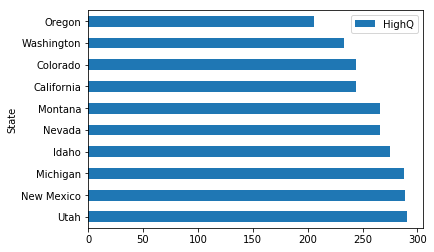

In [123]:
df.sort_values(by = 'HighQ', ascending = False).tail(10).plot(kind = 'barh', y = 'HighQ', x = 'State')

## Graph the top 5 least expensive and the top 5 most expensive states for high quality marijuana, in one graph

You'll probably need to make a new dataframe out of the first 5 and last 5.

In [124]:
cheap5 = df.sort_values(by = 'HighQ').head(5)
cheap5

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
31,Oregon,205.80,2179,180.90,2018,NaN,95
47,Washington,233.01,3341,189.92,3564,NaN,160
5,Colorado,243.72,3148,195.11,2877,NaN,178
4,California,243.96,16512,189.35,19151,NaN,1096
20,Montana,265.51,738,241.42,364,NaN,32


In [125]:
expens5 = df.sort_values(by = 'HighQ', ascending = False).head(5)
expens5

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
28,North Dakota,393.94,213,339.60,327,NaN,23
45,Vermont,371.23,357,308.86,367,NaN,32
32,Maryland,366.01,2863,255.84,2463,NaN,193
46,Virginia,364.95,3514,293.02,3085,NaN,285
15,Iowa,364.92,975,289.05,1045,NaN,122


In [126]:
comb = pd.concat([cheap5, expens5], ignore_index=True)

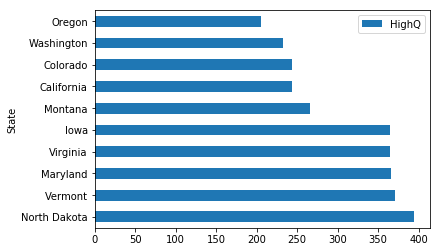

In [127]:
comb.sort_values(by = 'HighQ', ascending = False).plot(kind = 'barh', x = 'State', y = 'HighQ')

## Now go back and make one of those graphs look nice!

- Add a title
- Add a label to the bottom axis
- Remove the label on the left axis
- Remove the legend
- Get rid of the boxes around everything
- Remove most of the tick marks
- Add dollar signs for the bottom

For tips, just ask me and/or use

- https://matplotlib.org/gallery.html
- Especially https://matplotlib.org/examples/ticks_and_spines/spines_demo.html

To format numbers, you can use something that might look a little familiar

```python
import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))
```

In [128]:
import matplotlib.ticker as ticker

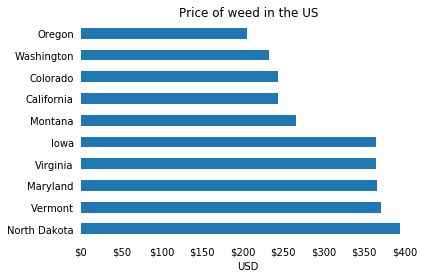

In [129]:
ax = comb.sort_values(by = 'HighQ', ascending = False).plot(kind = 'barh', x = 'State', y = 'HighQ', legend = False) 
ax.set_title("Price of weed in the US")
ax.set_ylabel("")
ax.set_xlabel("USD")
ax.set_frame_on(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))

# Reading in many many files

## Finding the filenames

Make a list of the filenames of every single CSV files inside of the `data` directory. Don't type them out.

If you do this correctly you will have a list of **491** filenames.

In [130]:
import glob

In [ ]:
files = glob.glob("data/*.csv")
files

['data/weedprices01012014.csv',
 'data/weedprices01012015.csv',
 'data/weedprices01022014.csv',
 'data/weedprices01022015.csv',
 'data/weedprices01032014.csv',
 'data/weedprices01042014.csv',
 'data/weedprices01052014.csv',
 'data/weedprices01062014.csv',
 'data/weedprices01062015.csv',
 'data/weedprices01072014.csv',
 'data/weedprices01072015.csv',
 'data/weedprices01082014.csv',
 'data/weedprices01092014.csv',
 'data/weedprices01102014.csv',
 'data/weedprices01112014.csv',
 'data/weedprices01122014.csv',
 'data/weedprices02012014.csv',
 'data/weedprices02012015.csv',
 'data/weedprices02022014.csv',
 'data/weedprices02022015.csv',
 'data/weedprices02032014.csv',
 'data/weedprices02042014.csv',
 'data/weedprices02052014.csv',
 'data/weedprices02062014.csv',
 'data/weedprices02062015.csv',
 'data/weedprices02072014.csv',
 'data/weedprices02072015.csv',
 'data/weedprices02092014.csv',
 'data/weedprices02102014.csv',
 'data/weedprices02112014.csv',
 'data/weedprices02122014.csv',
 'data/w

## Turn them into dataframes

Read each of them in, converting them to a **list of dataframes**. Save as `price_dfs`.

- Tip: List comprehensions would be good here

In [ ]:
price_dfs = [pd.read_csv(filename) for filename in files]
price_dfs

In [ ]:
len(price_dfs)

## Examing the results

Look at the first 2 rows of the first dataframe.

Look at the first 2 rows of the last dataframe.

**If we combined them, could we tell them apart?**

In [ ]:
price_dfs[0].head(2)

In [ ]:
price_dfs[-1].head(2)

## Making them identifiable

Each dataframe needs to have a column thats says the date. Or, actually... let's just save the filename as a column.

You **could** do it like this.

```python
# Take the first dataframe, which was made from the first filename
# Create a new 'filename' column using the first filename
price_dfs[0]['filename'] = filenames[0]
# Take the second dataframe, which was made from the second filename
# Create a new 'filename' column using the second filename
price_dfs[1]['filename'] = filenames[1]
# Take the third dataframe, which was made from the third filename
# Create a new 'filename' column using the third filename
price_dfs[2]['filename'] = filenames[2]
```

But that way is **not any fun**, and would take too long. I have a faster way.

In [ ]:
for filename, dataframe in zip(files, price_dfs):
    print("Looking at", filename)
    dataframe['filename'] = filename

## Combine all 491 dataframes into one dataframe

Confirm it has **24990 rows and 8 columns.**

In [ ]:
final_df = pd.concat([df for df in price_dfs], ignore_index = True)

In [ ]:
final_df.shape

In [ ]:
final_df.head()

## Pull out the day, month and year from each filename

Do **not** store it back yet!

In [ ]:
day = final_df['filename'].str.extract("(\d{2})")
#day
month = final_df['filename'].str.extract("\d{2}(\d{2})")
#month
year = final_df['filename'].str.extract("\d{2}\d{2}(\d{4})")
#year

## Okay, now add all three columns back at once

You should rename the columns first!

In [ ]:
final_df['day'] = day
final_df['month'] = month
final_df['year'] = year

final_df.head()

## Plot the change in marijuana prices in Oregon over time

## Plot the change in marijuana prices in all states over time